In [2]:
import os
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as th
import networkx as nx
import torch_geometric as pyg

import LPGNN

/home/mf/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-09-11 19:15:47.495732: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-11 19:15:47.495756: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
importlib.reload(LPGNN.popularity_similarity)
importlib.reload(LPGNN.embedding)
importlib.reload(LPGNN.poincare_embedding)
importlib.reload(LPGNN.distances)
importlib.reload(LPGNN.visualization.degree_distribution)
importlib.reload(LPGNN.visualization)
importlib.reload(LPGNN.utils)
importlib.reload(LPGNN.labne)
importlib.reload(LPGNN.graph_metrics)
importlib.reload(LPGNN.DataSetup)
importlib.reload(LPGNN.tree_pruning)
importlib.reload(LPGNN.LinkPrediction)

<module 'LPGNN.LinkPrediction' from '/home/mf/Documents/IB/Tesis/Maestria/LPGNN/LPGNN/LinkPrediction.py'>

In [3]:
seed = 456

In [6]:
N = 3000
avg_k = 8
gamma = 2.7
T = 0.1
seed += 1
dim = 2
PS = LPGNN.popularity_similarity.generatePSNetwork(N, avg_k, gamma, T, seed, dim=dim)

In [11]:
PS = LPGNN.DataSetup.train_test_split(PS, test_ratio=0.3, val_ratio=0, neg_samples=False)
# make PS_nx graph from train_pos_edge_label_index
PS_nx = nx.from_edgelist(PS.train_pos_edge_label_index.T.detach().numpy())
PS_nx = nx.Graph(PS_nx, is_directed=False)
nx.is_connected(PS_nx)

True

In [13]:
PS_LaBNE = LPGNN.labne.generateLaBNE(PS, edge_index='train_pos_edge_label_index', dim=2, normalize_radius=False)
R_LaBNE, P_LaBNE = LPGNN.LinkPrediction.precision_recall_score_file(PS_LaBNE, position_name='LaBNE_node_positions', filename=f'data/Distance_Lists/Radial_normalization/LaBNE', chunk_size=100000, skip_file_prep=False, step_size=1000, dist='hyp')

/home/mf/Documents/IB/Tesis/Maestria/LPGNN/LPGNN/labne.py:59: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  /opt/conda/conda-bld/pytorch_1640811740025/work/aten/src/ATen/native/Copy.cpp:244.)
  x_LE_cartesian = th.Tensor(eigenvectors[:,1:])


Calculating best minimal value for power law fit
Generating test mask...
Total test mask:  tensor(3597.)  . Total test edges:  3597
Generating hyperbolic distances and saving to file  data/Distance_Lists/Radial_normalization/LaBNE
Sorting file...
Reading file and generating precision-recall curve...
index: 4498000, R: 1.000, P: 0.001

In [14]:
PS_Poincare = LPGNN.poincare_embedding.poincare_embedding(PS, edge_index='train_pos_edge_label_index', init_pos=PS_LaBNE.LaBNE_node_positions, dim=2, epochs=100000, pre_norm_radius=0.01, normalize_radius=0.9, expm='exact')
R_Poincare, P_Poincare = LPGNN.LinkPrediction.precision_recall_score_file(PS_Poincare, position_name='PoincareEmbedding_node_positions', filename=f'data/Distance_Lists/Radial_normalization/Poincare', chunk_size=100000, skip_file_prep=False, step_size=1000, dist='hyp')

100%|██████████| 100000/100000 [02:13<00:00, 749.61it/s]


Generating test mask...
Total test mask:  tensor(3597.)  . Total test edges:  3597
Generating hyperbolic distances and saving to file  data/Distance_Lists/Radial_normalization/Poincare
Sorting file...
Reading file and generating precision-recall curve...
index: 4495000, R: 1.000, P: 0.001

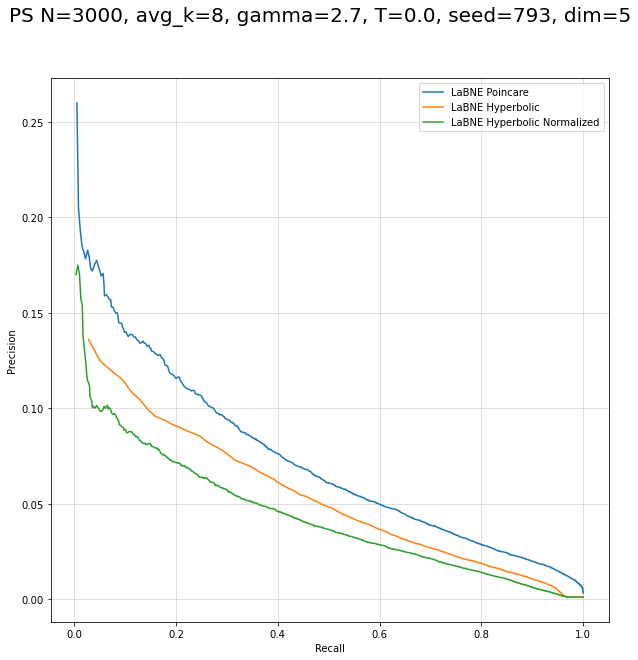

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle(f'PS N={N}, avg_k={avg_k}, gamma={gamma}, T={T}, seed={seed}, dim={dim}', fontsize=20)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.grid(alpha=0.5)

ax.plot(R_LaBNE_poincare, P_LaBNE_poincare, label='LaBNE Poincare')
ax.plot(R_LaBNE_hyp_nonorm, P_LaBNE_hyp_nonorm, label='LaBNE Hyperbolic')
ax.plot(R_LaBNE_hyp_norm, P_LaBNE_hyp_norm, label='LaBNE Hyperbolic Normalized')

ax.legend()
#ax.set_ylim(-0.001, 0.012)

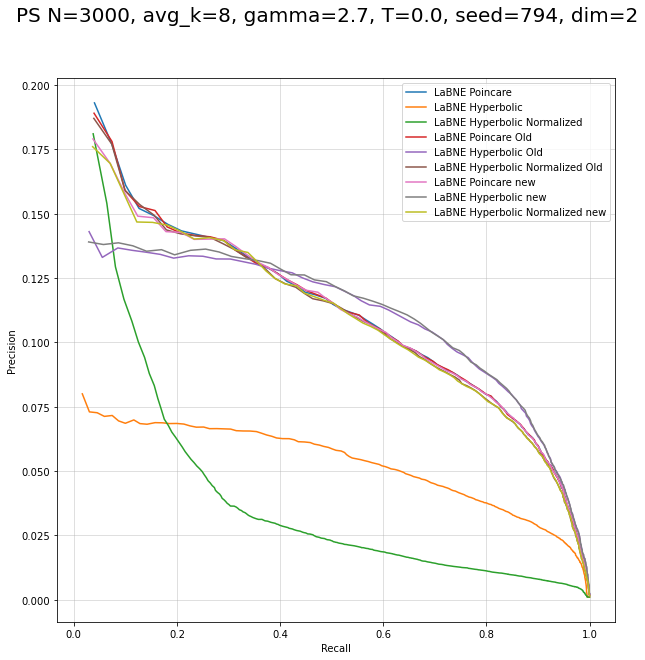

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle(f'PS N={N}, avg_k={avg_k}, gamma={gamma}, T={T}, seed={seed}, dim={dim}', fontsize=20)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.grid(alpha=0.5)

ax.plot(R_LaBNE_poincare, P_LaBNE_poincare, label='LaBNE Poincare')
ax.plot(R_LaBNE_hyp_nonorm, P_LaBNE_hyp_nonorm, label='LaBNE Hyperbolic')
ax.plot(R_LaBNE_hyp_norm, P_LaBNE_hyp_norm, label='LaBNE Hyperbolic Normalized')

ax.plot(R_LaBNE_poincare_old, P_LaBNE_poincare_old, label='LaBNE Poincare Old')
ax.plot(R_LaBNE_hyp_nonorm_old, P_LaBNE_hyp_nonorm_old, label='LaBNE Hyperbolic Old')
ax.plot(R_LaBNE_hyp_norm_old, P_LaBNE_hyp_norm_old, label='LaBNE Hyperbolic Normalized Old')

ax.plot(R_LaBNE_poincare_new, P_LaBNE_poincare_new, label='LaBNE Poincare new')
ax.plot(R_LaBNE_hyp_nonorm_new, P_LaBNE_hyp_nonorm_new, label='LaBNE Hyperbolic new')
ax.plot(R_LaBNE_hyp_norm_new, P_LaBNE_hyp_norm_new, label='LaBNE Hyperbolic Normalized new')

ax.legend()
#ax.set_ylim(-0.001, 0.012)

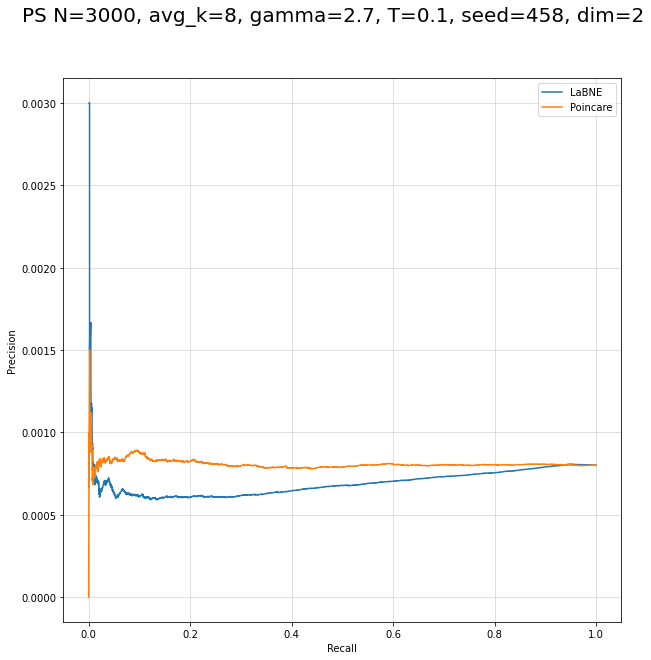

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
fig.suptitle(f'PS N={N}, avg_k={avg_k}, gamma={gamma}, T={T}, seed={seed}, dim={dim}', fontsize=20)
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.grid(alpha=0.5)

ax.plot(R_LaBNE, P_LaBNE, label='LaBNE')
ax.plot(R_Poincare, P_Poincare, label='Poincare')

ax.legend()
#ax.set_ylim(-0.001, 0.012)